In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('startup-expansion.xlxs')
dataset

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [4]:
dataset[['Marketing Spend', 'Revenue']].describe().round(3)


,Marketing Spend,Revenue
count,150.000,150.000
mean,2893.147,39301.433
std,367.863,15465.754
min,1811.000,15562.000
25%,2662.250,21113.500
50%,2898.000,42993.000
75%,3111.500,51145.500
max,3984.000,68828.000


<Axes: xlabel='Sales Region'>

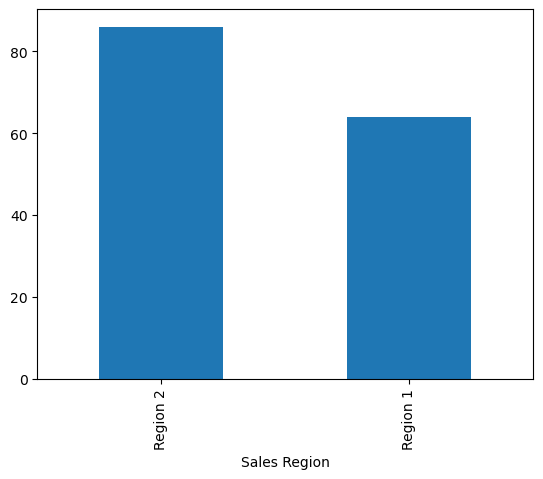

In [5]:
dataset['Sales Region'].value_counts().plot.bar()

In [6]:
dataset.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

<Axes: >

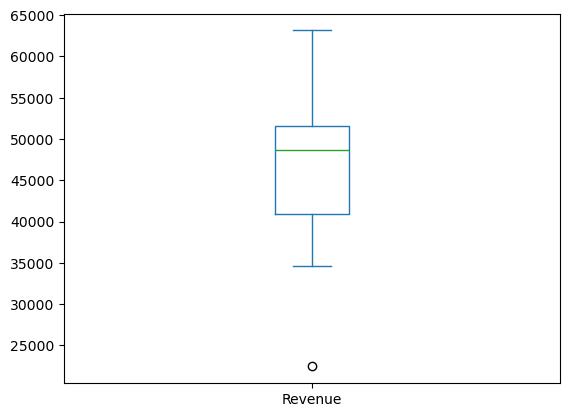

In [36]:
dataset[dataset['New Expansion'] == "New"].groupby('City').max()['Revenue'].nlargest(10).plot.box()

In [8]:
dataset[dataset['New Expansion'] == "Old"].groupby('City').max()['Revenue'].nlargest(10)

City
Little Rock       68828
Grand Rapids      65475
Rochester         64906
Oxnard            64302
Fontana           63027
Providence        62337
Birmingham        60338
Overland Park     59887
San Bernardino    59870
Worcester         59840
Name: Revenue, dtype: int64

In [9]:
round(dataset['Revenue'] / dataset['Marketing Spend'] * 100,2)

0      1868.90
1      1675.43
2      1790.25
3      1387.60
4      2087.38
        ...   
145    1537.23
146    1718.31
147    1638.10
148     750.07
149    1651.21
Length: 150, dtype: float64

In [10]:
dataset['Profit'] = dataset['Revenue'] - dataset['Marketing Spend']

In [11]:
dataset['ROMS'] = round(dataset['Profit'] / dataset['Marketing Spend'] * 100,2)

In [12]:
dataset['ROMS%'] = dataset['ROMS'] / 100

<Axes: >

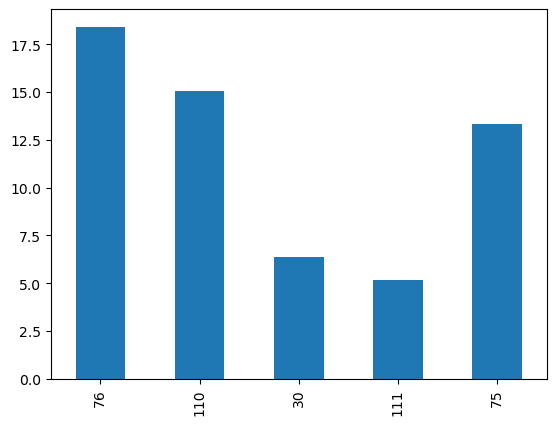

In [40]:
dataset['ROMS%'].sample(5).plot.bar()

In [14]:
dataset

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


In [38]:
dataset.to_csv('startup-expansion.csv')